Ex 1

In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [5]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_4/height_1_ppc.stan to exe file /home/AGH-Data-Analytics/lab_4/height_1_ppc
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_4/height_1_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


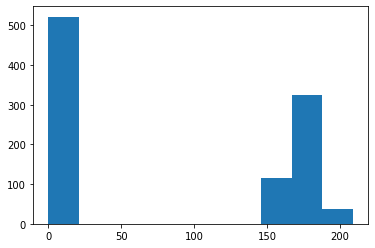

In [12]:
mi = sim.stan_variable('mi')
hist = plt.hist(mi, bins=10)

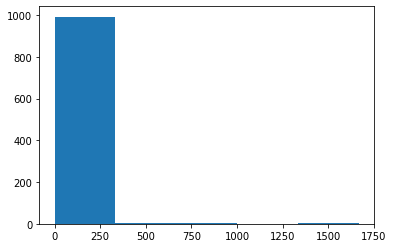

In [10]:
delta = sim.stan_variable('delta')
hist = plt.hist(delta, bins=5)

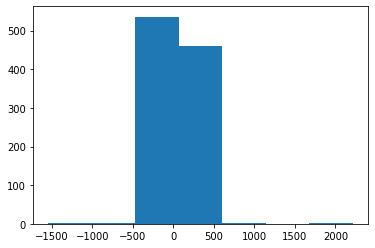

In [17]:
height = sim.stan_variable('height')
hist = plt.hist(height, bins=7)

Ex 2

In [18]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_4/height_1_fit.stan to exe file /home/AGH-Data-Analytics/lab_4/height_1_fit
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_4/height_1_fit
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_4/height_1_fit.hpp /home/AGH-Data-Analytics/lab_4/height_1_fit.stan
Warning in '/home/AGH-Data-Analytics/lab_4/height_1_fit.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_

In [19]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


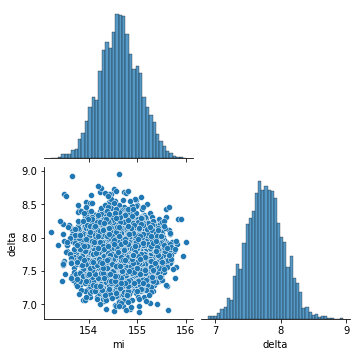

In [23]:
import seaborn as sns
import pandas as pd

mi_samples = fit.stan_variable('mi')
delta_samples = fit.stan_variable('delta')

samples_df = pd.DataFrame({'mi': mi_samples, 'delta': delta_samples})

sns.pairplot(samples_df, corner=True)

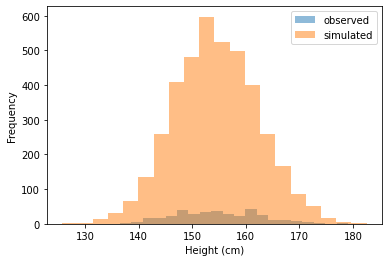

In [28]:
import matplotlib.pyplot as plt

heights_observed = d.height.values
heights_simulated = fit.stan_variable('height_sim')

plt.hist(heights_observed, bins=20, alpha=0.5, label='observed')
plt.hist(heights_simulated, bins=20, alpha=0.5, label='simulated')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Ex 3

In [35]:
d['c_weight'] = d['weight'] - d['weight'].mean()

data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
print(data_sim)

{'N': 50, 'weight': array([-13.91943352, -13.26797358, -12.61651364, -11.9650537 ,
       -11.31359376, -10.66213383, -10.01067389,  -9.35921395,
        -8.70775401,  -8.05629407,  -7.40483413,  -6.75337419,
        -6.10191425,  -5.45045432,  -4.79899438,  -4.14753444,
        -3.4960745 ,  -2.84461456,  -2.19315462,  -1.54169468,
        -0.89023474,  -0.23877481,   0.41268513,   1.06414507,
         1.71560501,   2.36706495,   3.01852489,   3.66998483,
         4.32144477,   4.9729047 ,   5.62436464,   6.27582458,
         6.92728452,   7.57874446,   8.2302044 ,   8.88166434,
         9.53312428,  10.18458421,  10.83604415,  11.48750409,
        12.13896403,  12.79042397,  13.44188391,  14.09334385,
        14.74480379,  15.39626373,  16.04772366,  16.6991836 ,
        17.35064354,  18.00210348])}


Ex 4

In [34]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /home/AGH-Data-Analytics/lab_4/height_2a_ppc.stan to exe file /home/AGH-Data-Analytics/lab_4/height_2a_ppc
INFO:cmdstanpy:compiled model executable: /home/AGH-Data-Analytics/lab_4/height_2a_ppc
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/AGH-Data-Analytics/lab_4/height_2a_ppc.hpp /home/AGH-Data-Analytics/lab_4/height_2a_ppc.stan
Warning in '/home/AGH-Data-Analytics/lab_4/height_2a_ppc.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/AGH-Data-Analytics/lab_4/height_2a_ppc.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatica


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: variable does not exist; processing stage=data initialization; variable name=height; base type=double (in '/home/AGH-Data-Analytics/lab_4/height_2a_ppc.stan', line 3, column 2 to column 17)Command and output files:
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/home/AGH-Data-Analytics/lab_4/height_2a_ppc', 'id=1', 'random', 'seed=29042020', 'data', 'file=/tmp/tmpbv1uy8vs/ogb9kcun.json', 'output', 'file=/tmp/tmpbv1uy8vs/height_2a_ppc-20230412213153.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpbv1uy8vs/height_2a_ppc-20230412213153.csv
 console_msgs (if any):
	/tmp/tmpbv1uy8vs/height_2a_ppc-20230412213153_0-stdout.txt